# A Study of Suicide Rates by Year and Country

**Last updated:** 12-Jul-2020

![Dark](https://www.sane.org/images/easyblog_images/143/a12228b73ec867e8092bb529c347c8be_XL.jpg)
**Source:** https://www.sane.org/

Welcome to my Suicide Rates Exploratory Data Anaylsis (EDA) Project, this is an integral part of my learning for the Intro to Python for Data Analytics course.
In this repository, I will be saving all of my data analytics work on the Suicide Rates Overview datasets.

### Australian Bureau of Statistics 2017 Data
![ABS2017](https://mindframemedia.imgix.net/assets/src/uploads/Infographic-National-summary.png?auto=compress%2Cformat&crop=focalpoint&fit=min&fp-x=0.5&fp-y=0.5&h=1440&ixlib=php-1.1.0&q=50&w=1920&s=09927d817ea2c29b5dc7ee16884d55e3)
**Source:** https://mindframe.org.au/suicide/data-statistics/abs-data-summary-2017


## I. Requirements

1. Go to [Kaggle Datasets](https://www.kaggle.com/datasets) and pick a dataset of your choosing. Preferrably in CSV or TSV format.
2. Open a new Jupyter Notebook and give this Mini Assessment a compelling title.
3. Add two to three paragraphs where you first describe the dataset and then the reason why you chose it.
4. Create a table of contents that holds the general steps of the data analytics cycle.
5. Create a section called **Load Data** and read in your data using pandas. Make sure you use at least one of the additional arguments of the method `.read_csv()`.
6. Create a new section and inspect your data. Finish that section with 4 or 5 sentences on what you what you saw in the data. Any Inconsistencies or issues that where easy to spot since the beginning.
7. Create a new section and get and deal with the missing values. At the end of the new section, write at least two paragraphs explaining the steps you took for dealing with missing values. Make sure you outlined any of the assumptions in your process, e.g. the distribution of X variable was highly skewed so I choose to fill in values using the median instead.
8. Describe and visualise your data. Call this Section Exploratory Data Analysis.
    - Create at least 2 pivot tables and describe what is in it. Your aggregation function, variables chosen, etc.
    - Use at least 2 `.groupby()` methods and explain your logic behind it.
    - Create 7 visualisations showing different variables and combinations of your variables. At least one of them has to be interactive. They should have a title, and labels where appropriate. Explain each one of your charts with at least a paragraph.
9. Write a concluding paragraph summarising what you have done.
10. Add a section called **Future Work** and add at least 5 hypotheses that would be interesting for you to test with that data later on.
11. Create a folder for this mini-assessment. Add a README.md file and explain what your notebook contains. Share the link to your repo with a classmate kindly requesting feedback. Send it to your instructor as well.


## II. Introduction

Suicide is a person's deliberate act of killing oneself. According to the World Health Organisation (2019), every year there are around 800,000 suicides and many more suicide attempts around the world. [Here is the link to access the WHO Suicide Factsheet](https://www.who.int/news-room/fact-sheets/detail/suicide). 

I will like to understand who is the most at risk and to investigate correlations of increased suicide rate amongst cohorts of various social-economic groups.

This compact dataset consists of data recorded from 101 countries spanning across 2 decades (from 1985 to 2016) and contains interesting fields such as:
- Human Development Index (HDI) for the year: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Defintion sourced from: United Nations Development Program - [http://hdr.undp.org/en/indicators/137506](http://hdr.undp.org/en/indicators/137506).
- GDP for the year
- GDP per capita
- Generation

Besides my passion in data analytics, I am also a non-practising registered nurse (RN), and have an interest in Suicide Prevention and anything related to Mental Health, this is why I chose this dataset for the project.


## III. Table of Contents

I. Requirements
II. Introduction
III. Table of Contents
1. Load Data
2. Cleaning and Manipulation
3. Exploratory Data Analysis
4. Report Findings
IV. Future Work
V. Repository Structure

### 1. Load Data

- The dataset we will be using in this project comes from Kaggle. [Here is the link to access that data.](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [1]:
#Let's examine the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\maggi\Desktop\master.csv', low_memory=False)

In [3]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,nan,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,nan,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,nan,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,nan,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,nan,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,nan,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,nan,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,nan,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,nan,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,nan,"2,156,624,900",796,Generation X


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.shape

(27820, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.00,2001.26,8.47,1985.00,1995.00,2002.00,2008.00,2016.00
suicides_no,27820.00,242.57,902.05,0.00,3.00,25.00,131.00,22338.00
population,27820.00,1844793.62,3911779.44,278.00,97498.50,430150.00,1486143.25,43805214.00
suicides/100k pop,27820.00,12.82,18.96,0.00,0.92,5.99,16.62,224.97
HDI for year,8364.00,0.78,0.09,0.48,0.71,0.78,0.85,0.94
gdp_per_capita ($),27820.00,16866.46,18887.58,251.00,3447.00,9372.00,24874.00,126352.00


In [8]:
#percentage of missing data
missing_pct = ((df.isna().sum() / df.shape[0]) * 100)
missing_pct

country               0.00
year                  0.00
sex                   0.00
age                   0.00
suicides_no           0.00
population            0.00
suicides/100k pop     0.00
country-year          0.00
HDI for year         69.94
 gdp_for_year ($)     0.00
gdp_per_capita ($)    0.00
generation            0.00
dtype: float64

In [9]:
#the amount of missing data
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [10]:
len(df['country'].unique())

101

In [11]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

- The dataset consists of 27820 rows and 12 columns
- Should be 12 rows per country-year combination (6 age bands * 2 genders)
- Caveats/Issues:
    1. Duplicate values - the same value is repeated in the 'HDI for year', 'gdp_for_year' and 'gdp_per_capita' columns for each country-year.
    2. The column 'gdp_for_year' starts with a space in front of the name
    3. '($)' at the end of 'gdp' column names
    4. There are close to 70% of missing data in the 'HDI for year' column
    5. There are countries with 3 (or less) years of data

### 2. Cleaning & Manipulation
Make sure you outlined any of the assumptions in your process, e.g. the distribution of X variable was highly skewed so I choose to fill in values using the median instead.

In [17]:
# we will start with making a copy of the raw data before making changes

df2 = df.copy()

In [18]:
# Normalise the column names for improved readability

# Remove space from column names 
df2.columns = df2.columns.str.strip() 
df2.rename(columns={'suicides_no':'suicides','suicides/100k pop':'suicides_100kpop', 'gdp_for_year ($)':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df2.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'suicides_100kpop', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           27820 non-null  object 
 1   year              27820 non-null  int64  
 2   sex               27820 non-null  object 
 3   age               27820 non-null  object 
 4   suicides          27820 non-null  int64  
 5   population        27820 non-null  int64  
 6   suicides_100kpop  27820 non-null  float64
 7   country-year      27820 non-null  object 
 8   HDI for year      8364 non-null   float64
 9   gdp_for_year      27820 non-null  object 
 10  gdp_per_capita    27820 non-null  int64  
 11  generation        27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [20]:
df2['country-year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [22]:
df_ready = df2.reset_index(drop=True).copy()

In [23]:
df_ready.to_csv('suicide_ready.csv', index=False)

### 3. Exploratory Data Analysis  

In [24]:
df = pd.read_csv(r'C:\Users\maggi\Desktop\suicide_ready.csv', low_memory=False)

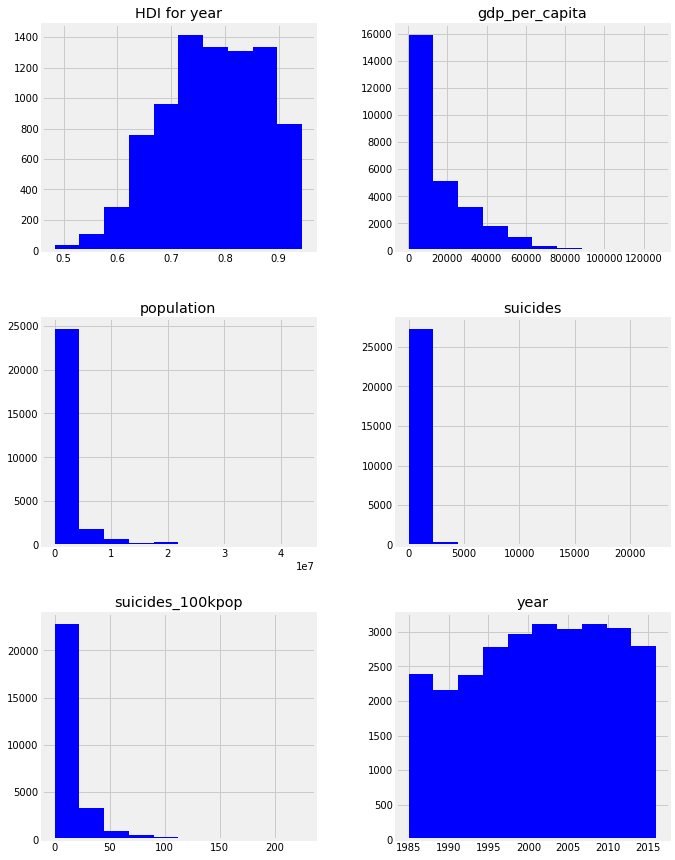

In [28]:
# Let's start with some histograms of the quantitative data in our dataset
df.hist(grid=True,figsize=(10,15),color='blue')
plt.show()

The distribution of 'HID per year' and 'year' are negatively skewed, whilst the others are all positively skewed. 

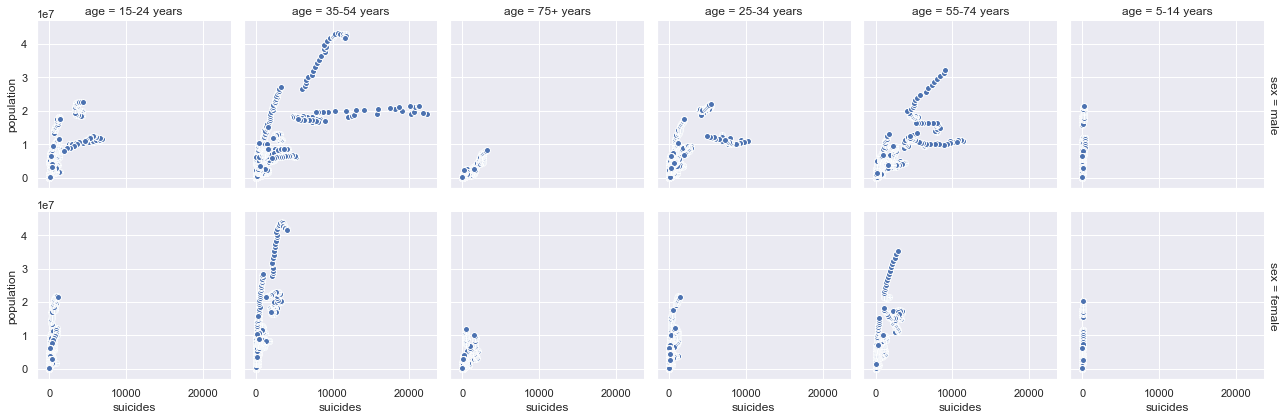

In [29]:
# Suicides by sex and age scatterplot grids
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

g = sns.FacetGrid(df, row="sex", col="age", margin_titles=True)

g.map(plt.scatter, "suicides","population", edgecolor="w")

The grid that stands out in terms of the highest number of suicides is the male between 35-54 years. 

In [30]:
# Presenting the number of suicides by age in a table
suicides_sex_age = df[['sex', 'age', 'suicides']].groupby(['sex', 'age']).mean()
suicides_sex_age

suicides
sex    age                  
female 15-24 years     75.59
       25-34 years     89.97
       35-54 years    218.11
       5-14 years       7.37
       55-74 years    185.28
       75+ years       95.64
male   15-24 years    272.77
       25-34 years    394.26
       35-54 years    838.39
       5-14 years      15.30
       55-74 years    529.26
       75+ years      185.75

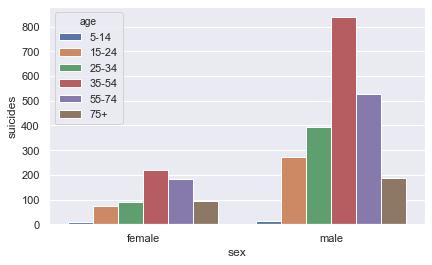

In [31]:
#Let's re-arrange age categories into ascending order and remove the wording
suicides_sex_age.reset_index(inplace=True)
suicides_sex_age['age'] = suicides_sex_age['age'].str.replace(' years', '')

age_sort = {'5-14': 0, '15-24': 1, '25-34': 2, '35-54': 3, '55-74':4,'75+': 5} 
suicides_sex_age['sort'] = suicides_sex_age['age'].map(age_sort)
suicides_sex_age.sort_values(by='sort', inplace=True)
suicides_sex_age.drop('sort', axis=1, inplace=True)

sns.barplot(x='sex', y='suicides', hue='age', data=suicides_sex_age)

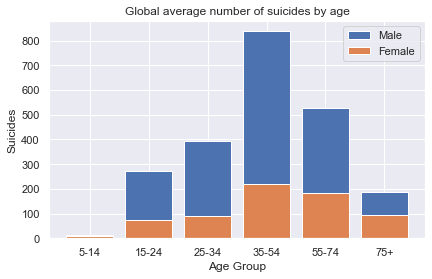

In [32]:
#Add labels and improve layout of histogram
age_groups = suicides_sex_age['age'].unique()
male_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'male']['suicides']
female_suicides = suicides_sex_age[suicides_sex_age['sex'] == 'female']['suicides']

plt.bar(age_groups, male_suicides, label='Male')
plt.bar(age_groups, female_suicides, label='Female')

plt.title('Global average number of suicides by age')
plt.xlabel('Age Group')
plt.ylabel('Suicides')
plt.legend()
plt.show()

- This chart shows male suicide counts are significantly higher than females across all age groups.
- The 35-54 age group have the highest number of suicides for both male and female.
- Male suicides for most age groups are 3 times higher than females, and double in for the 2 extreme age groups (5-14 and 75+).

In [33]:
#Lets visualise the change in suicide numbers for age groups over the years

age_15 = df.loc[df.loc[:, 'age']=='15-24 years',:]
age_35 = df.loc[df.loc[:, 'age']=='35-54 years',:]
age_75 = df.loc[df.loc[:, 'age']=='75+ years',:]
age_25 = df.loc[df.loc[:, 'age']=='25-34 years',:]
age_55 = df.loc[df.loc[:, 'age']=='55-74 years',:]
age_5 = df.loc[df.loc[:, 'age']=='5-14 years',:]

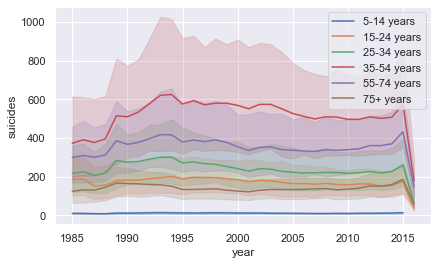

In [34]:
p = sns.lineplot(x='year', y='suicides', data=age_5)
q = sns.lineplot(x='year', y='suicides', data=age_15)
r = sns.lineplot(x='year', y='suicides', data=age_25)
s = sns.lineplot(x='year', y='suicides', data=age_35)
t = sns.lineplot(x='year', y='suicides', data=age_55)
t = sns.lineplot(x='year', y='suicides', data=age_75)

_ = plt.legend(['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])

The age group of 35-54 dominates this chart with the most changes

In [35]:
#Lets visualise the change in suicide numbers for both male and female over the years
male_population = df.loc[df.loc[:, 'sex']=='male',:]
female_population = df.loc[df.loc[:, 'sex']=='female',:]

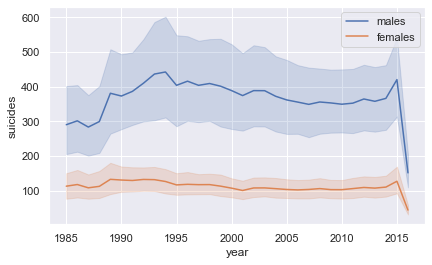

In [61]:
p = sns.lineplot(x='year', y='suicides', data=male_population)
q = sns.lineplot(x='year', y='suicides', data=female_population)

_ = plt.legend(['males', 'females'])

- On average, male's suicide numbers are 3 times higher than females. 
- It seems the suicide rate was declining from 1994, until a sharp spike in 2015. The major event in 2015 was the Global Financial Crisis.

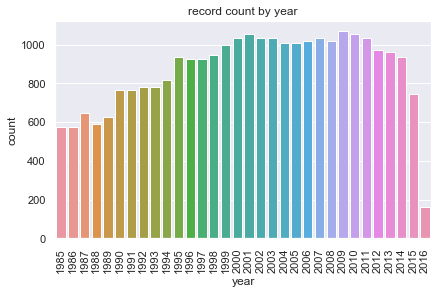

In [63]:
# to see the distribution of data by year
y = df['year']
sns.countplot(x='year', data=df)
plt.xticks(rotation=90)
plt.title("record count by year")
plt.show()

In [43]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import pandas as pd
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [66]:
# create your figure and add it to a variable
plot = figure(plot_width=400, tools='pan, box_zoom')

# use your Glyph method of choice and pass in vars
plot.circle(df['year'], df['suicides'])
output_file('suicide_by_years.html') # will save the output as an html file

# show your figure
show(plot)

There appears to be very little amount of data in the year 2016

In [65]:
#suicides_vs_gpd

suicides_vs_gpd = df[['suicides_100kpop', 'year', 'gdp_per_capita']].groupby('year').mean()
suicides_vs_gpd.reset_index(inplace=True)
suicides_vs_gpd

,year,suicides_100kpop,gdp_per_capita
0,1985,11.83,6091.23
1,1986,11.42,7126.10
2,1987,11.64,8712.59
3,1988,12.71,9983.86
4,1989,12.88,9725.04
5,1990,12.86,9806.33
6,1991,13.44,10132.94
7,1992,13.50,10506.71
8,1993,13.83,10553.58
9,1994,14.07,11567.10


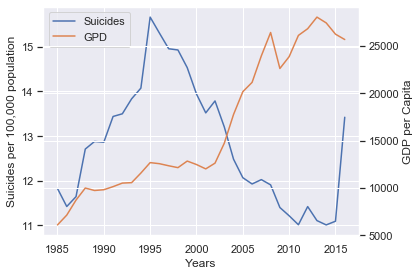

In [40]:
fig, ax1 = plt.subplots()

# Plot the number of suicides over the years.
lns1 = ax1.plot(suicides_vs_gpd['year'], suicides_vs_gpd['suicides_100kpop'], 'C0', label='Suicides')

# Create a shared axis for plotting on a different scale for the GPD.
ax2 = ax1.twinx()
lns2 = ax2.plot(suicides_vs_gpd['year'], suicides_vs_gpd['gdp_per_capita'], 'C1', label='GPD')

# Join both legends into the same box.
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Set the labels.
ax1.set_ylabel('Suicides per 100,000 population')
ax2.set_ylabel('GDP per Capita')
ax1.set_xlabel('Years')

plt.tight_layout()
plt.show()

- This chart shows from 1995 onwards that as GDP increases, the number of suicide decreases. 
- 1995 will be around when the US Financial Crisis occured (https://www.cfr.org/timeline/us-financial-crisis)

In [41]:
#Pivot table of total number of suicides per country over the years
year_country = df[df['year']!=2016].pivot_table(
    index=['year'],
    values='suicides',
    columns='country',
    aggfunc='sum'
).T

year_country

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,nan,nan,73.00,63.00,68.00,nan,nan,47.00,73.00,50.00,88.00,89.00,170.00,154.00,139.00,54.00,119.00,133.00,124.00,146.00,0.00,0.00,124.00,160.00,0.00,96.00,nan,nan,nan,nan,nan
Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,nan,nan,0.00,0.00,2.00,2.00,0.00,1.00,2.00,0.00,0.00,1.00,0.00,0.00,nan,nan,0.00,0.00,0.00,1.00
Argentina,1988.00,2284.00,2286.00,2354.00,2247.00,2140.00,1951.00,2184.00,2230.00,2241.00,2204.00,2229.00,2184.00,2347.00,2423.00,2774.00,3132.00,3162.00,3289.00,3121.00,3058.00,3108.00,2946.00,3059.00,2884.00,2943.00,2912.00,3248.00,2987.00,3231.00,3073.00
Armenia,nan,nan,nan,nan,nan,93.00,80.00,83.00,106.00,112.00,130.00,87.00,77.00,66.00,67.00,61.00,60.00,74.00,59.00,nan,nan,78.00,71.00,63.00,53.00,73.00,67.00,79.00,67.00,58.00,74.00
Aruba,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,8.00,nan,nan,nan,9.00,10.00,4.00,9.00,2.00,8.00,10.00,9.00,8.00,4.00,4.00,7.00,9.00,nan,nan,nan,nan
Australia,1861.00,2044.00,2164.00,2172.00,2066.00,2202.00,2288.00,2251.00,2038.00,2283.00,2170.00,2426.00,2646.00,2632.00,2488.00,2391.00,2458.00,2319.00,2156.00,2114.00,nan,2117.00,2229.00,2341.00,2337.00,2420.00,2392.00,2580.00,2608.00,2891.00,3027.00
Austria,2091.00,2139.00,2069.00,1851.00,1898.00,1825.00,1769.00,1759.00,1704.00,1776.00,1788.00,1779.00,1592.00,1559.00,1555.00,1588.00,1489.00,1553.00,1456.00,1422.00,1399.00,1297.00,1285.00,1267.00,1278.00,1264.00,1288.00,1276.00,1291.00,1314.00,1251.00
Azerbaijan,nan,nan,nan,nan,nan,114.00,134.00,144.00,119.00,47.00,49.00,69.00,107.00,56.00,54.00,62.00,317.00,92.00,129.00,108.00,nan,nan,55.00,nan,nan,nan,nan,nan,nan,nan,nan
Bahamas,1.00,nan,3.00,nan,nan,nan,nan,nan,7.00,3.00,2.00,3.00,2.00,3.00,6.00,11.00,1.00,3.00,1.00,2.00,4.00,2.00,5.00,4.00,6.00,10.00,4.00,5.00,5.00,nan,nan


- From the pivot table above, there appears to be quite a few countries with very few years of data. 
- I will remove those with less than 3 years of data if I was to clean this data again.

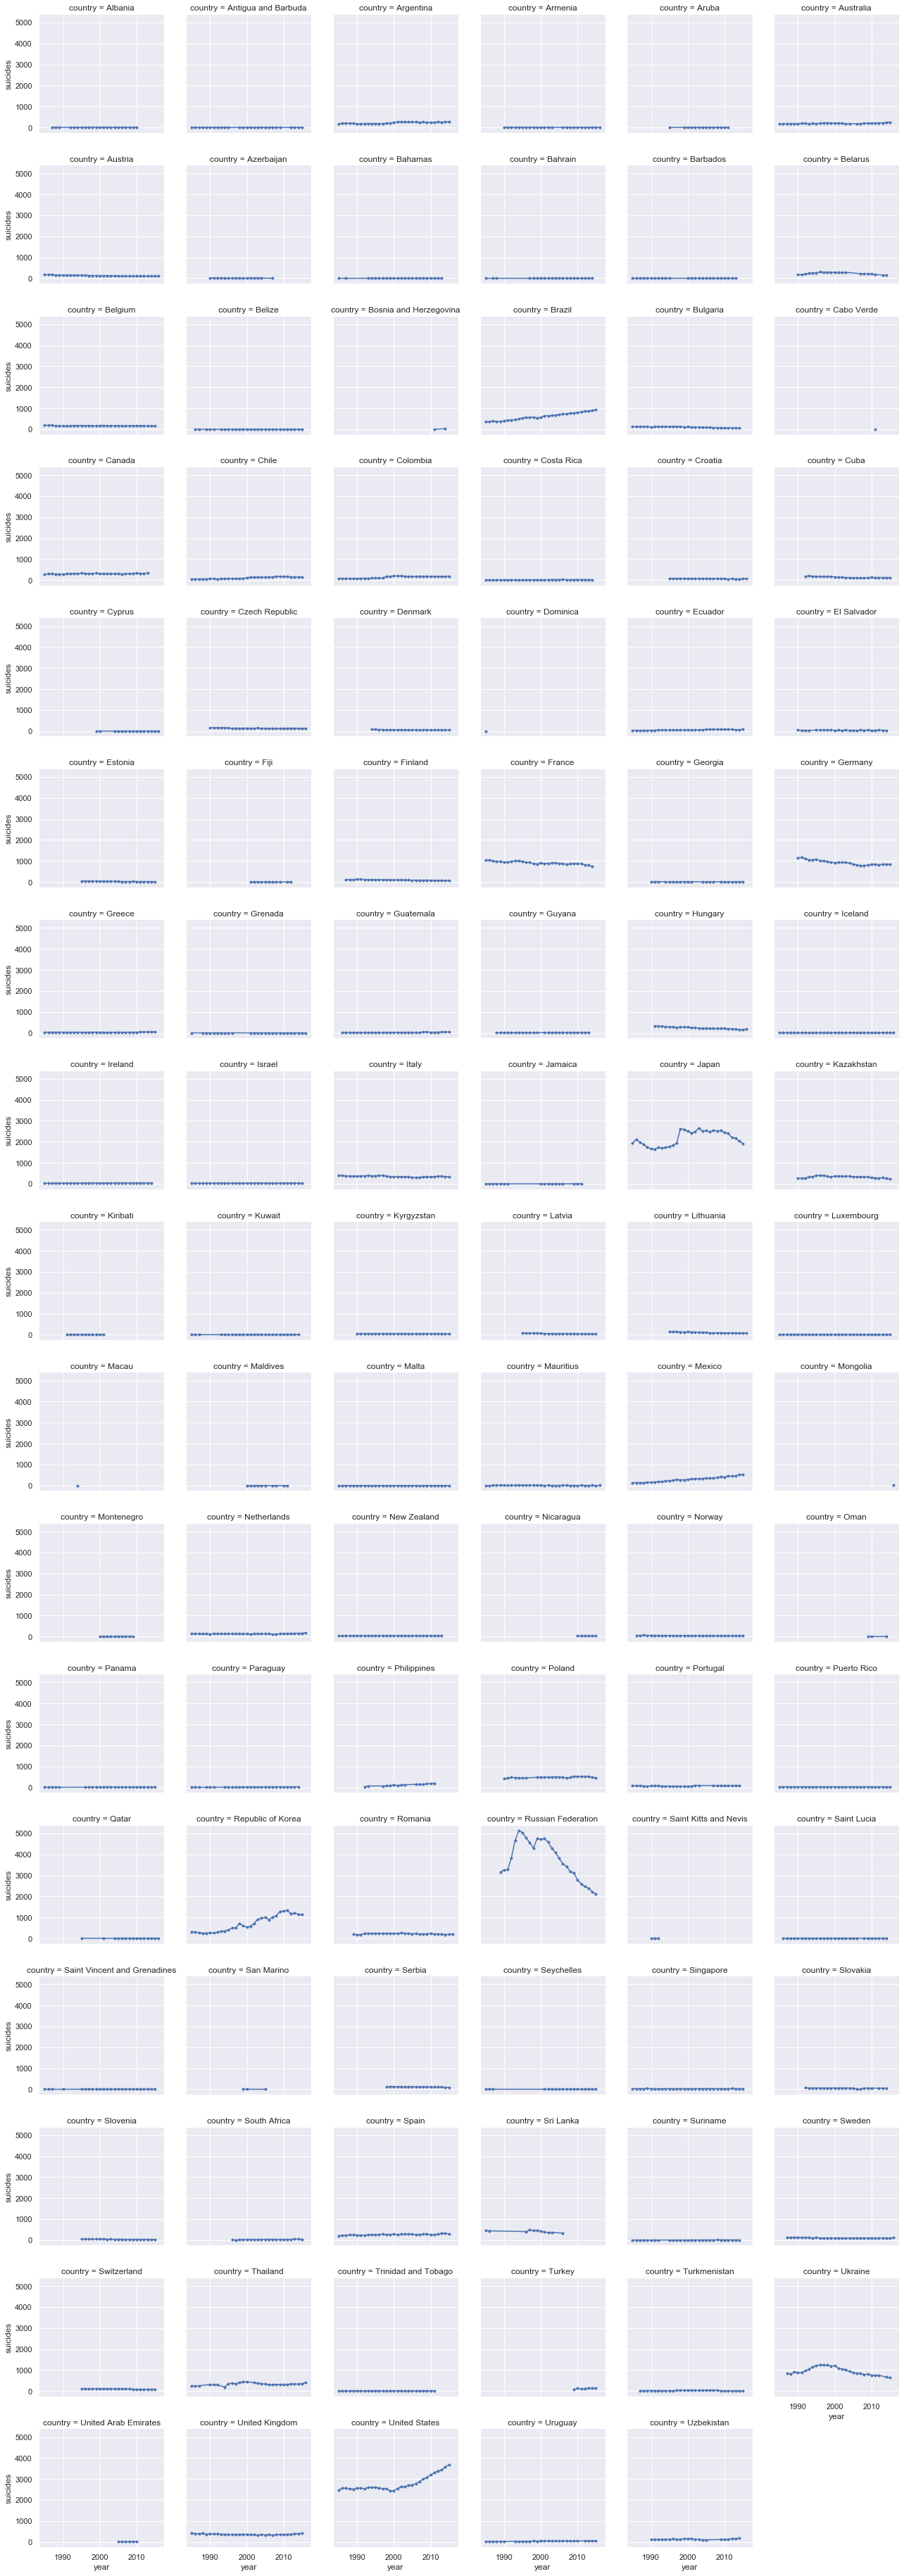

In [42]:
# Average suicide rate by country
suicides_country = df[['country', 'year', 'suicides']].groupby(['country', 'year']).mean()
g = sns.FacetGrid(suicides_country.groupby(['country','year']).suicides.sum().reset_index(), col='country', col_wrap=6, row_order='suicides')
g = g.map(plt.plot, "year", "suicides", marker=".")

- Not every country have recorded data consistently across the 2 decades, some from the beginning (e.g. Sri Lanka), others have data for a few years in the middle (e.g. Aruba), and there are those that recorded towards the end of the reporting period (e.g. Turkey), it will be fair to observe the average suicide count per year for each country.
- The top 10 countries with the highest average suicide rate in descending order are: Russian Federation, United States, Japan, Ukraine, Germany, France, Republic of Korea, Brazil, Poland and Sri Lanka.
- The countries continuing to trend upwards are Brazil and United States.

### 4. Report findings
From this EDA, I have learnt that male suicides are much higher than females. The predominate age group of highest suicide count is between 35-54 years.

In terms of change in suicide rate across the globe, there were 2 peaks across the 2 decades, both coinciding with financial crisis. This also aligns with the opposite correlation between suicides vs. GDP.

## IV. Future Work


I will like to carry out the following analyses in the future:
- group the countries by continents to see if suicide rates are higher only in certain continents
- to analysis if suicide rate is lower in countries with higher HDI
- to analysis if suicide rate is higher in countries with lower GDP per capita
- to link suicide data with suicide prevention data to see the success rate of intervention
- to disprove an occupation with constant high level of stress is a leading factor towards to a suicidal tendency

## V. Repository Structure

[README.md](https://github.com/nsxmags/eda_suicides/blob/master/README.md)

[eda_suicides.ipynb](https://github.com/nsxmags/eda_suicides/tree/master/eda_suicides.ipynb) <-- This is the complete assessment workbook!

[Code Folder](https://github.com/nsxmags/eda_suicides/tree/master/code)
- [Cleaning](https://github.com/nsxmags/eda_suicides/tree/master/code/clean)
- [EDA](https://github.com/nsxmags/eda_suicides/tree/master/code/eda)

[Data Folder](https://github.com/nsxmags/eda_suicides/tree/master/data)
- [Clean Data]()
- [Raw Data](https://github.com/nsxmags/eda_suicides/tree/master/data/raw_data)
    
[EDA Folder](https://github.com/nsxmags/eda_suicides/tree/master/eda)
- [EDA](https://github.com/nsxmags/eda_suicides/tree/master/eda/eda)
- [Chart](https://github.com/nsxmags/eda_suicides/tree/master/eda/chart)